Day 6: Cross-Validation (CV)
🎯 Objective of the day

Understand why a single train/test split isn’t reliable.

Learn how to use k-fold cross-validation.

Apply it on Titanic with Logistic Regression and Random Forest.

Cross-validation splits the dataset into k parts and trains the model k times, each time using a different part as test data. The scores are averaged to get a more stable, reliable measure of performance than a single train/test split.

📝 Notes

Problem with single split: your results depend heavily on how the data was split.

Cross-validation: splits into k folds, trains k times, averages results → much more reliable.

Larger k = more training, more stable, but also more compute.

CV is the foundation for hyperparameter tuning (you’ll do this in Week 4 with GridSearch).

Logistic Regression CV scores: [0.77653631 0.78651685 0.78651685 0.76966292 0.83146067]
Mean accuracy: 0.7901387232439896
Random Forest CV scores: [0.76536313 0.80337079 0.85955056 0.7752809  0.8258427 ]
Mean accuracy: 0.805881614462369


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7500\3157921669.py:60: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results.values(), labels=results.keys())


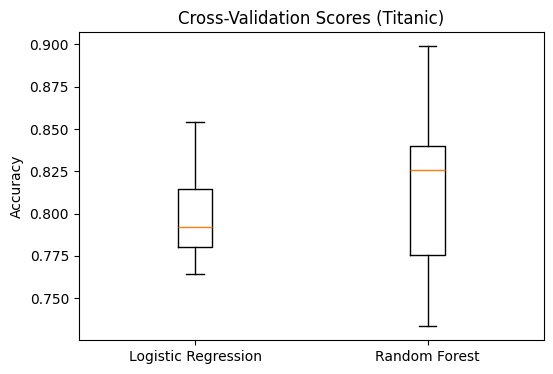

In [5]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

df = sns.load_dataset("titanic")

X = df[["pclass", "sex", "age", "fare", "sibsp", "parch", "embarked"]]
y = df["survived"]

numeric_features = ["age", "fare", "sibsp", "parch"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_features = ["pclass", "sex", "embarked"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Logistic regression with CV

log_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

scores = cross_val_score(log_reg, X, y, cv=5, scoring="accuracy")
print("Logistic Regression CV scores:", scores)
print("Mean accuracy:", scores.mean())

# Random forest with CV

rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

scores_rf = cross_val_score(rf, X, y, cv=5, scoring="accuracy")
print("Random Forest CV scores:", scores_rf)
print("Mean accuracy:", scores_rf.mean())

# Plot
plt.figure(figsize=(6,4))
plt.boxplot(results.values(), labels=results.keys())
plt.ylabel("Accuracy")
plt.title("Cross-Validation Scores (Titanic)")
plt.show()




📊 Exercise of the Day

What were the mean accuracies for Logistic Regression and Random Forest across 5 folds?

Compare them with your single train/test split results from earlier. Were the CV results more stable?

Why is cross-validation more reliable than a single split?

1) 
Logistic Regression Mean accuracy: 0.7901387232439896

Random Forest Mean accuracy: 0.805881614462369

2) 
No CV
-Logistic Regression Accuracy: 0.7877094972067039

-Random Forest Accuracy: 0.7821229050279329

With CV
-Logistic Regression Mean accuracy: 0.7901387232439896

-Random Forest Mean accuracy: 0.805881614462369

3) 
It si better as it uses all the data for both training and testing. This reduces depndece on one lucky/unlucky split giving a more reliable estimate of model performance.

🌟 Mini-Challenge

Try 10-fold CV instead of 5-fold.

Compare the mean accuracy and variability (spread of scores).
👉 What do you notice as k increases?

Logistic Regression CV scores: [0.77777778 0.79775281 0.76404494 0.82022472 0.79775281 0.7752809
 0.78651685 0.78651685 0.83146067 0.85393258]
Mean accuracy: 0.7991260923845193
Random Forest CV scores: [0.73333333 0.80898876 0.75280899 0.82022472 0.8988764  0.83146067
 0.83146067 0.76404494 0.84269663 0.84269663]
Mean accuracy: 0.8126591760299625


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7500\1842995620.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results.values(), labels=results.keys())


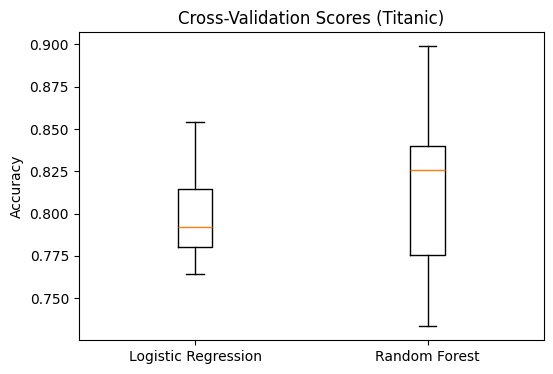

In [6]:
scores = cross_val_score(log_reg, X, y, cv=10, scoring="accuracy")
print("Logistic Regression CV scores:", scores)
print("Mean accuracy:", scores.mean())

scores_rf = cross_val_score(rf, X, y, cv=10, scoring="accuracy")
print("Random Forest CV scores:", scores_rf)
print("Mean accuracy:", scores_rf.mean())



# Collect results
results = {
    "Logistic Regression": scores,
    "Random Forest": scores_rf
}

# Plot
plt.figure(figsize=(6,4))
plt.boxplot(results.values(), labels=results.keys())
plt.ylabel("Accuracy")
plt.title("Cross-Validation Scores (Titanic)")
plt.show()


With 10 folds the accuracy slightly imporves. AS we can see in the box plot the spread is very similar as when we used 5.